## Linear regression 

In [1]:
import numpy as np

x = np.array([6,8,7.3,7.4])
y = np.array([53,79,69,80])

n = len(x)
sum_x  = np.sum(x)
sum_y  = np.sum(y)
sum_xx = np.sum(x*x)
sum_xy = np.sum(x*y)
sum_yy = np.sum(y*y)
mean_x = np.mean(x)
mean_y = np.mean(y)
numerator = sum_xy - (sum_x*sum_y)/n
denominator = sum_xx - ((sum_x*sum_x)/n)
m = numerator/denominator
b = mean_y - m*mean_x

# calculate y when x is 7.2
res = m*7.2 + b
res

70.5969447708578

## Machine Learning

### Multiple regression - Supervised

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [3]:
# Load data into dataframes
import pandas as pd

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

diabetes_df['DiseaseProgress'] = pd.Series(diabetes.target)
print(diabetes_df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  DiseaseProgress  
0   -0.002592  0.01990

In [4]:
# explore

pd.set_option('precision', 4)
pd.set_option('max_columns', 9)
pd.set_option('display.width', None)

diabetes_df.head()

,age,sex,bmi,bp,...,s4,s5,s6,DiseaseProgress
0,0.0381,0.0507,0.0617,0.0219,...,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,...,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,...,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,...,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,...,-0.0026,-0.0320,-0.0466,135.0


In [ ]:
diabetes_df.describe()

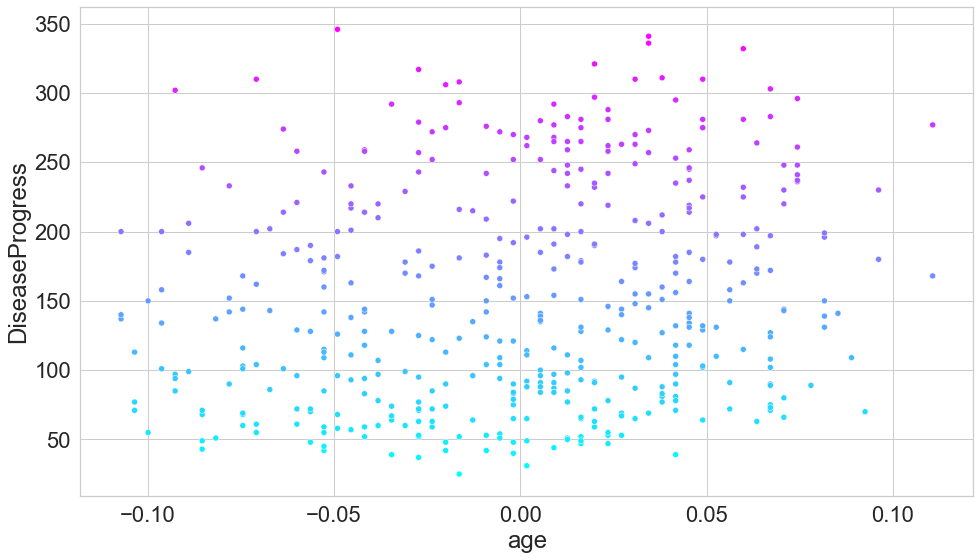

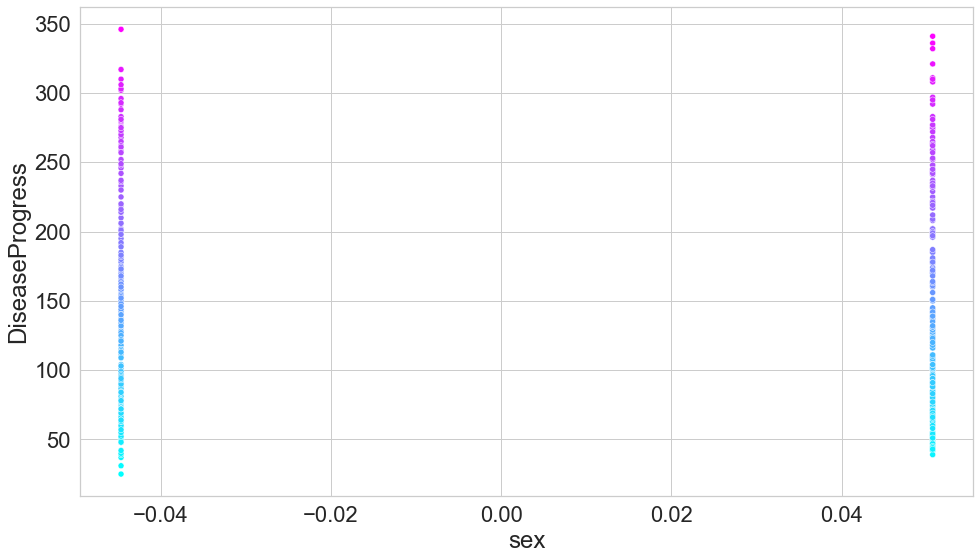

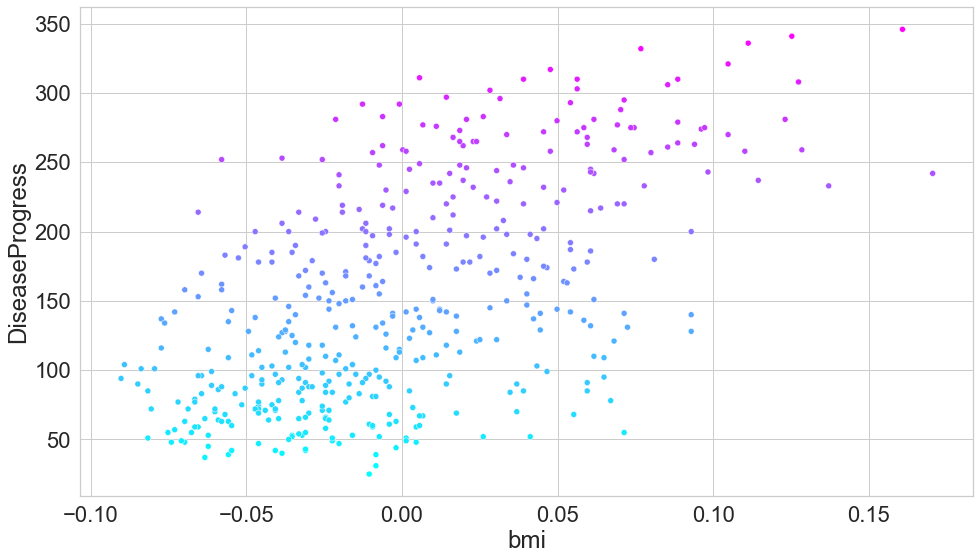

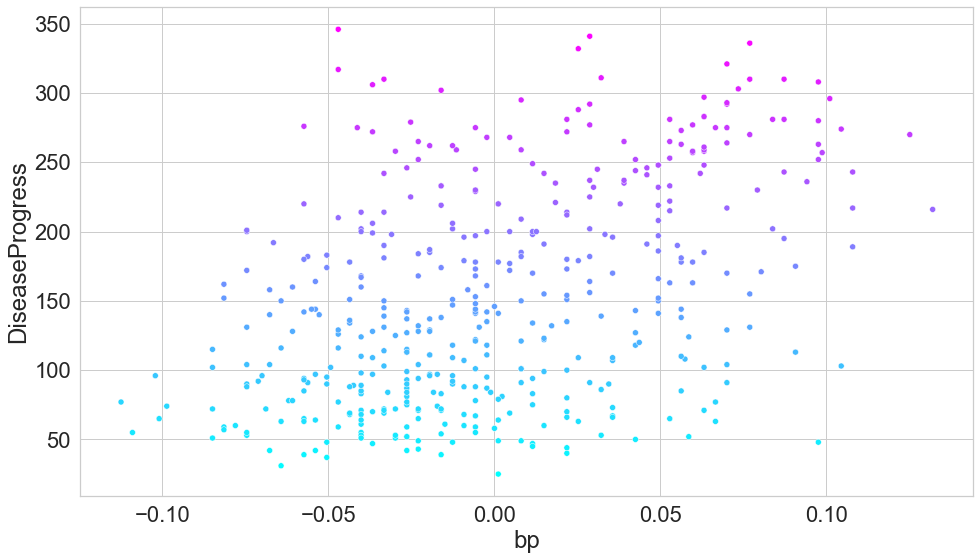

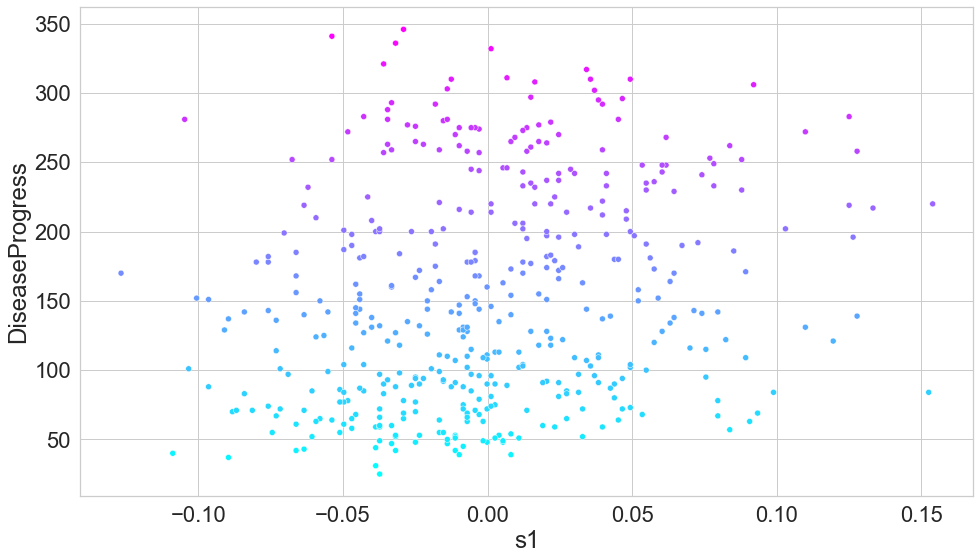

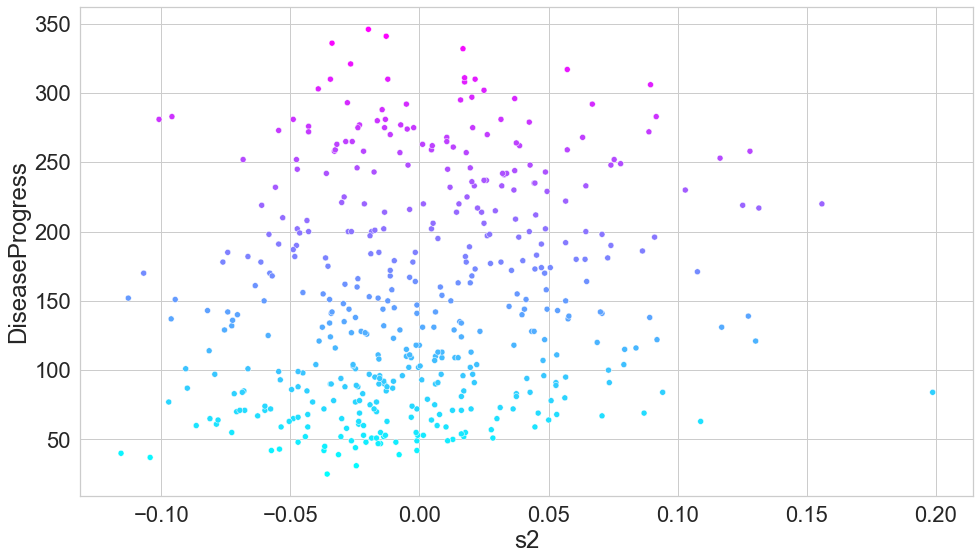

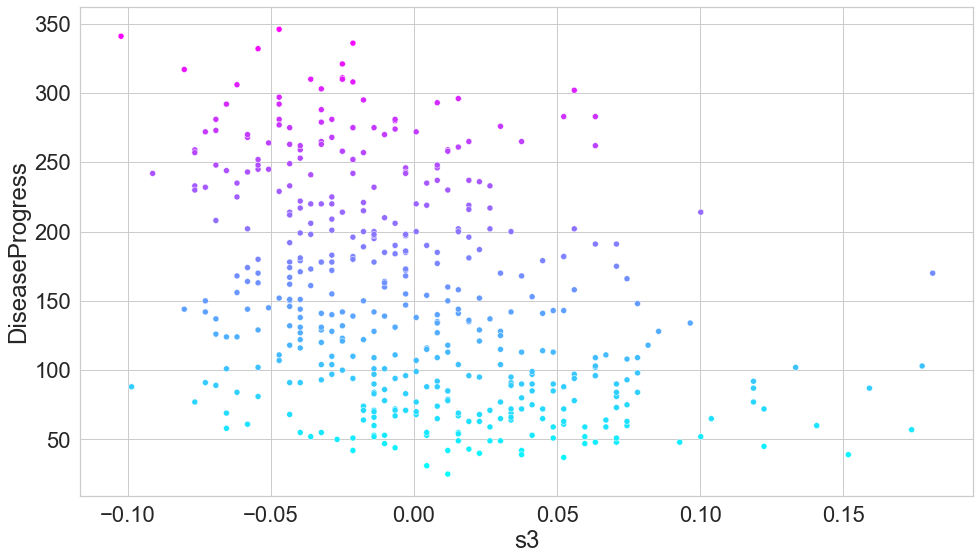

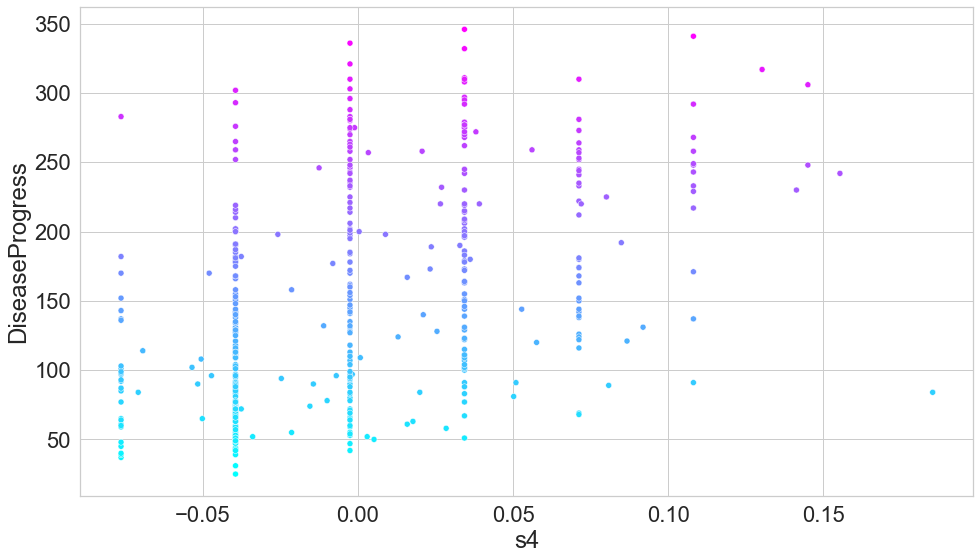

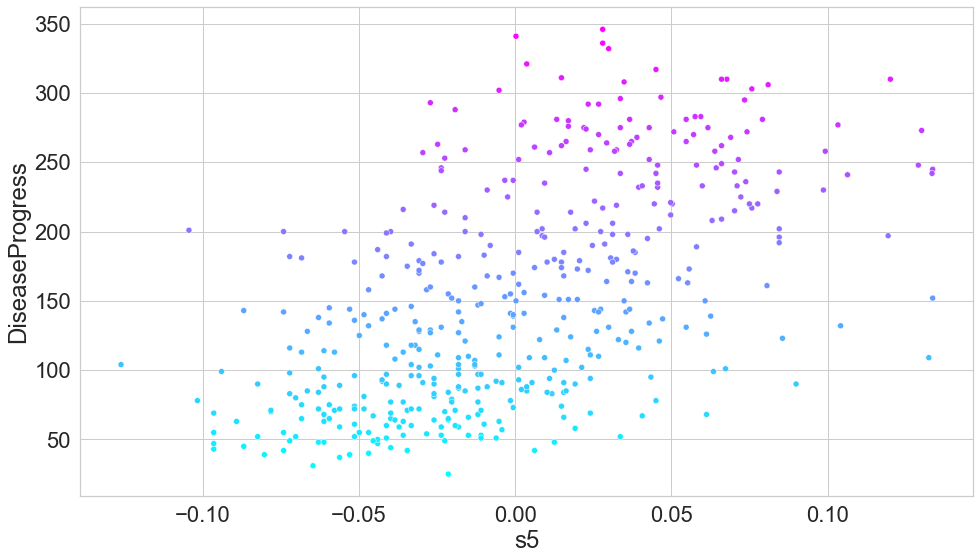

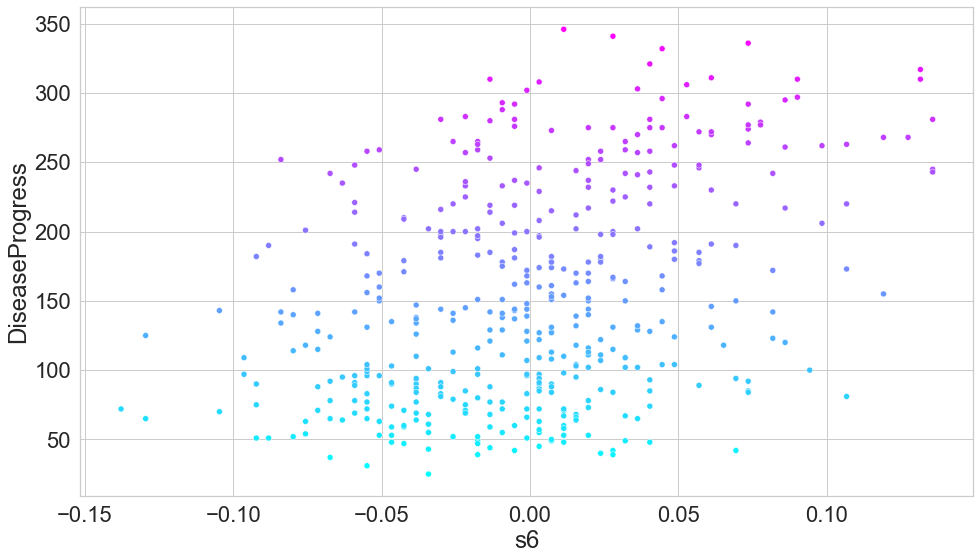

In [5]:
# visualization

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in diabetes.feature_names:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=diabetes_df, x=feature, y='DiseaseProgress', 
                     hue='DiseaseProgress', 
                     palette='cool', legend=False)

In [5]:
# split the data for training and testing

from sklearn.model_selection import train_test_split

# test_size = 0.2 indicates 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,diabetes.target,test_size=0.2)

# shape gives the number of rows and columns of train and test datasets.
print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (353, 10)
Shape of testing  set = (89, 10)


In [6]:
# train the model

from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(X=X_train, y=y_train)

for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>11}: {linear_regression_model.coef_[i]:24.20f}')

print()
print(f'y-intercept: {linear_regression_model.intercept_:23.20f}')

        age:  -7.49888797759454472924
        sex: -223.74403470808792349089
        bmi: 516.07934992890136527421
         bp: 338.71470079983873802121
         s1: -835.48939761890778754605
         s2: 497.78371501840371138314
         s3:  81.01500097129846267308
         s4: 176.75663693426454869950
         s5: 759.39079711258784755046
         s6:  37.67667374052896889225

y-intercept: 151.83856197572114865579


In [10]:
# test the model

import math
from sklearn import metrics
import numpy as np

# print(X_test)
predicted = linear_regression_model.predict(X_test)
expected  = y_test

# print(predicted)
# print(expected)
r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 0.6
     correlation coefficient = 0.7


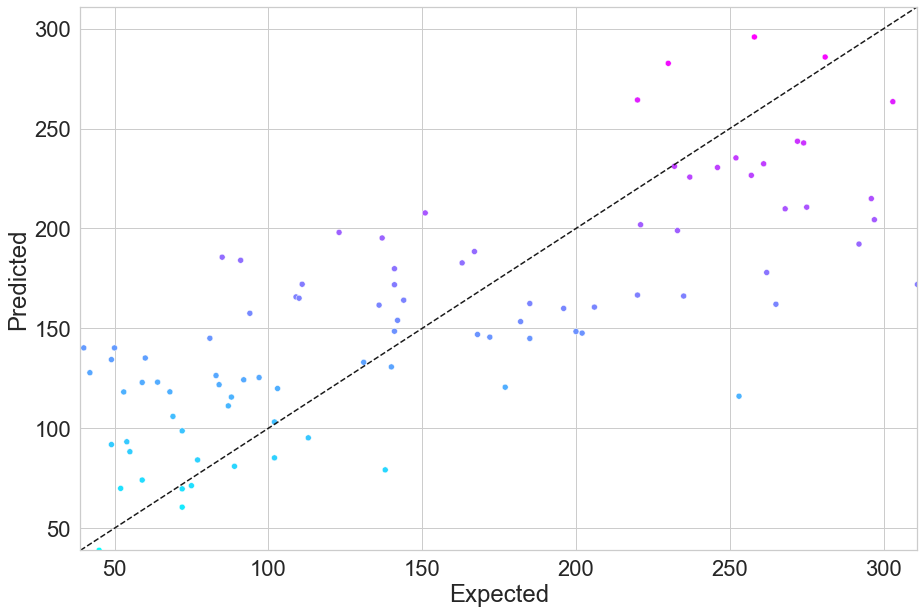

In [9]:
# expected vs predicted

df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

In [10]:
# predict new estimation
linear_regression_model.predict(np.array([[0.058970,0.023876, 0.047989, 0.078291, -0.026133, -0.83626, -0.011156, 0.095737,\
                            0.067378, -0.0383111]]))[0]


152.54712441424562

### KNN classification - Supervised

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
# Load data into dataframes
import pandas as pd

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

wine_df['wine_class'] = pd.Series(wine.target)
print(wine_df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [ ]:
wine_df.tail()

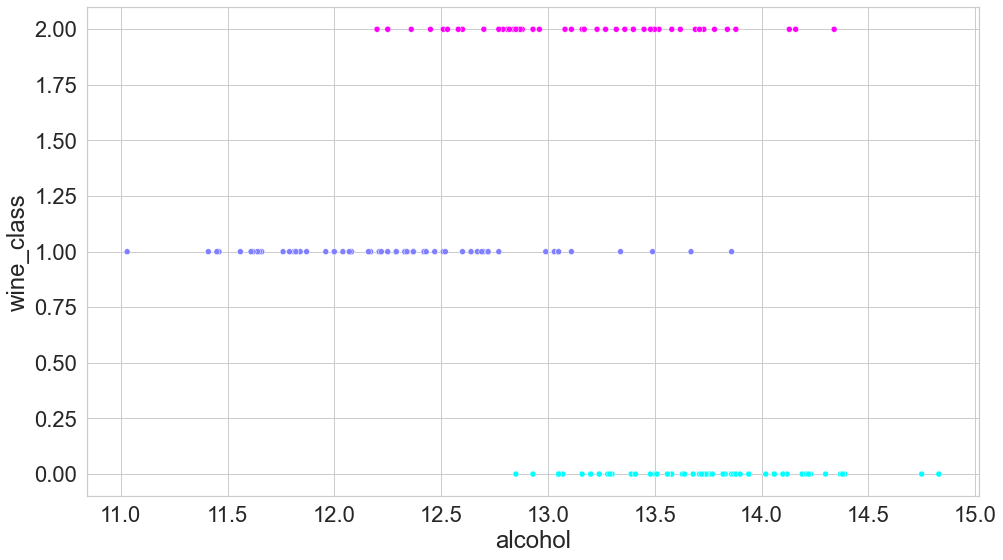

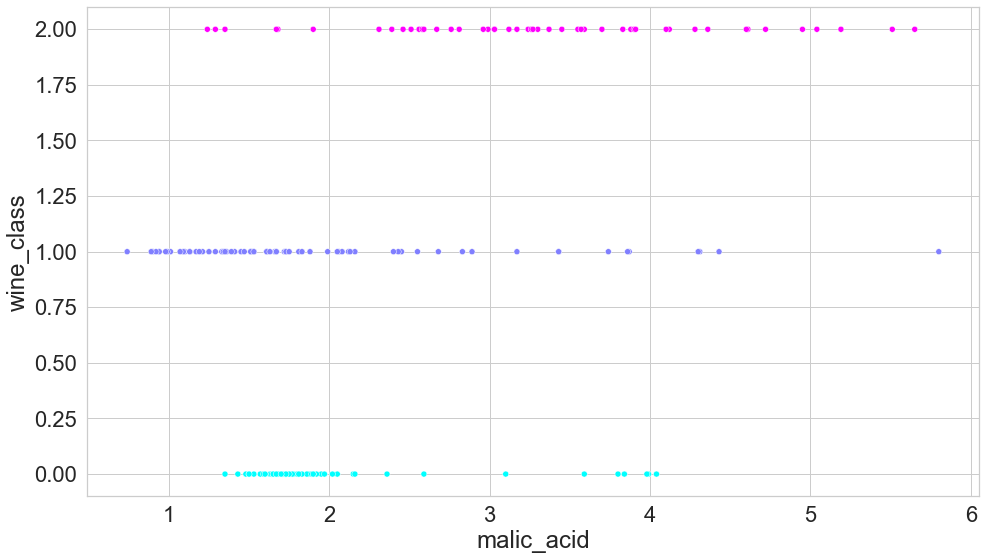

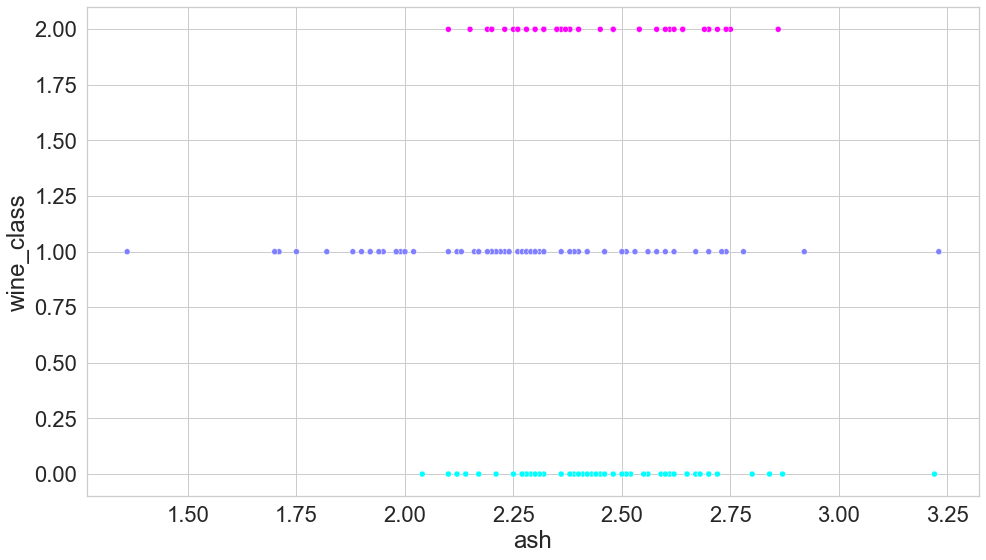

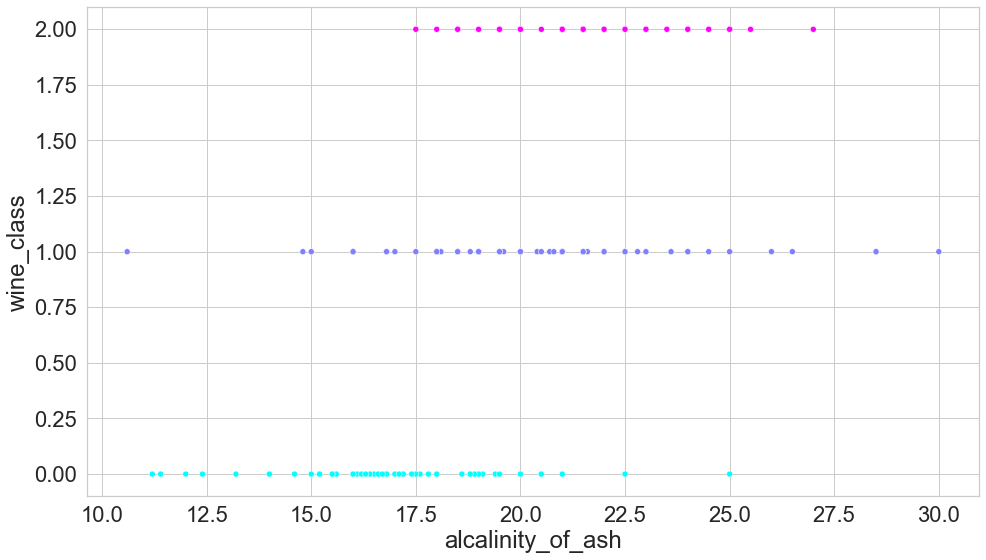

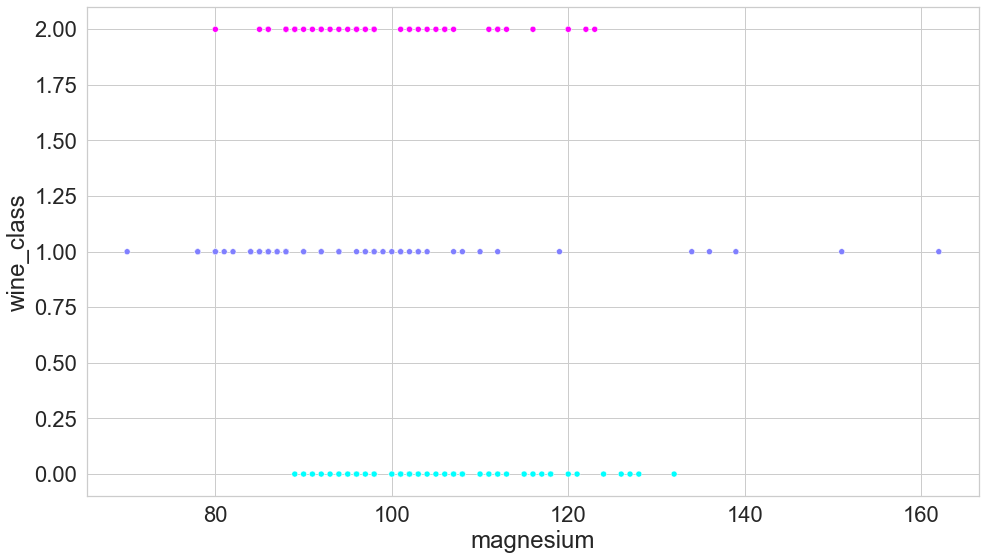

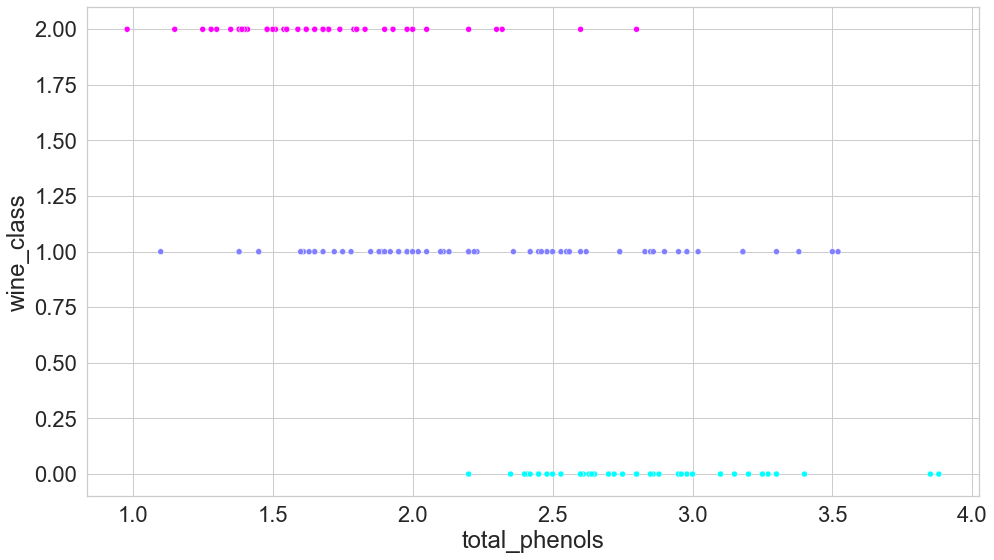

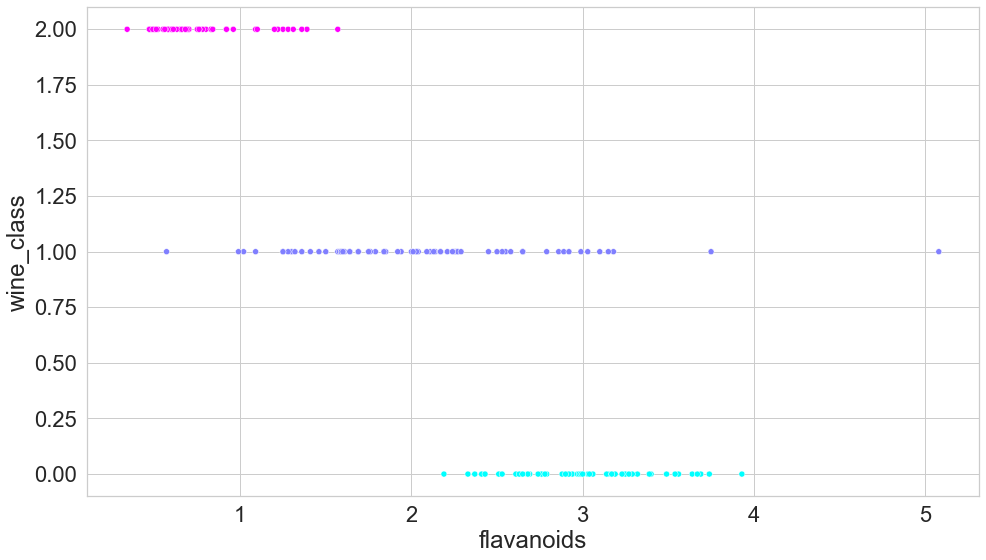

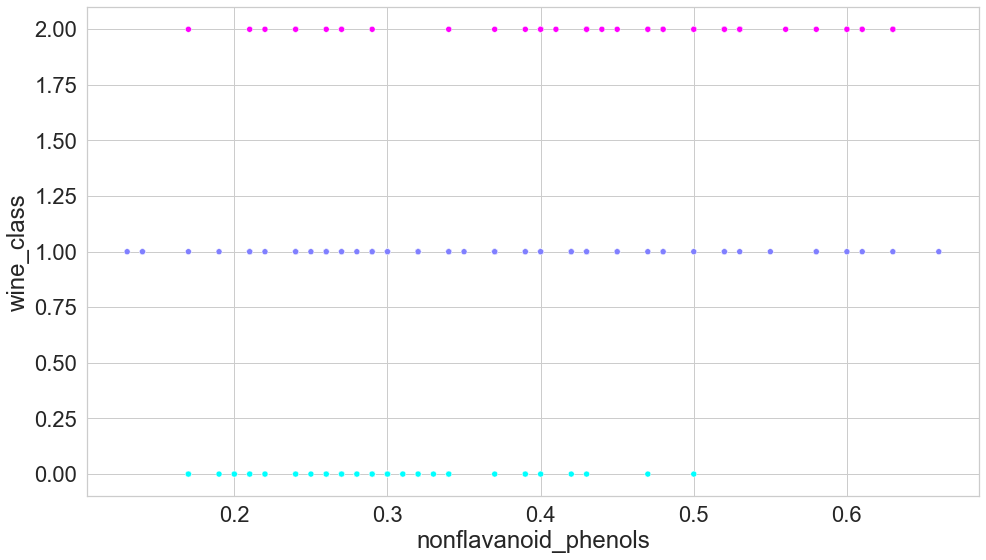

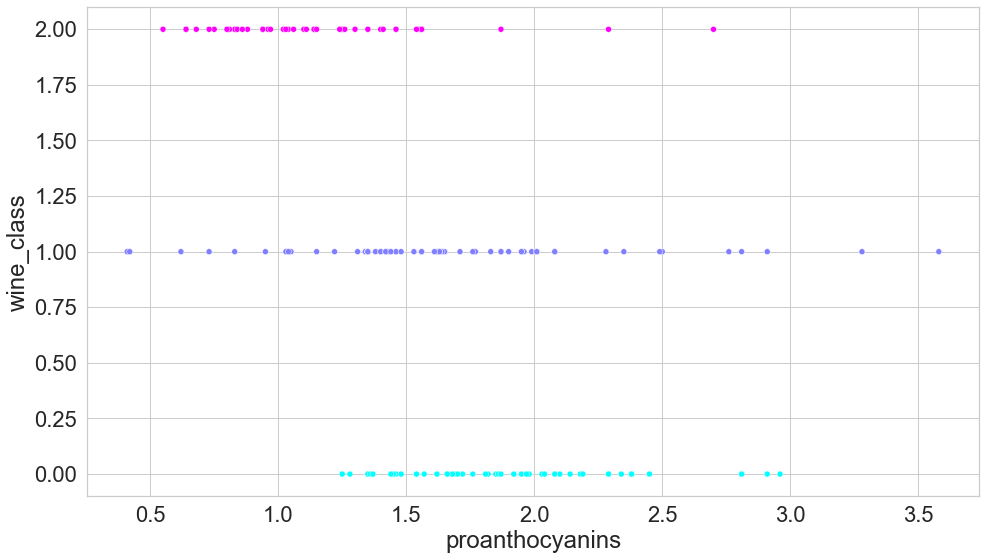

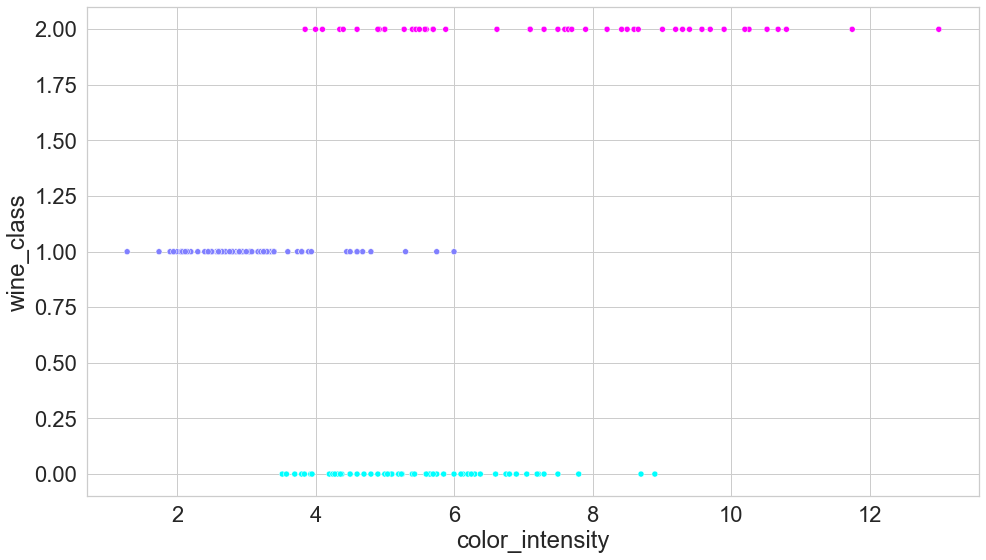

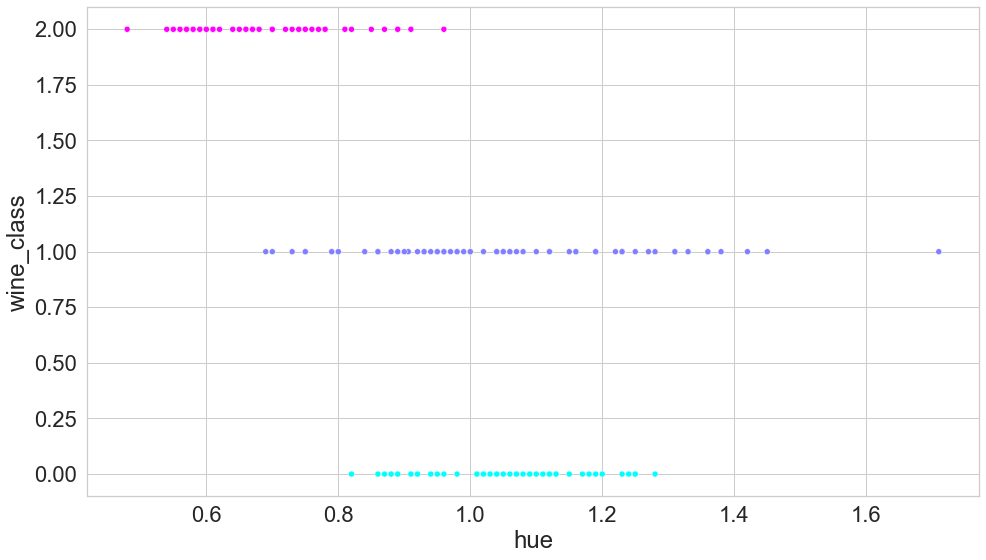

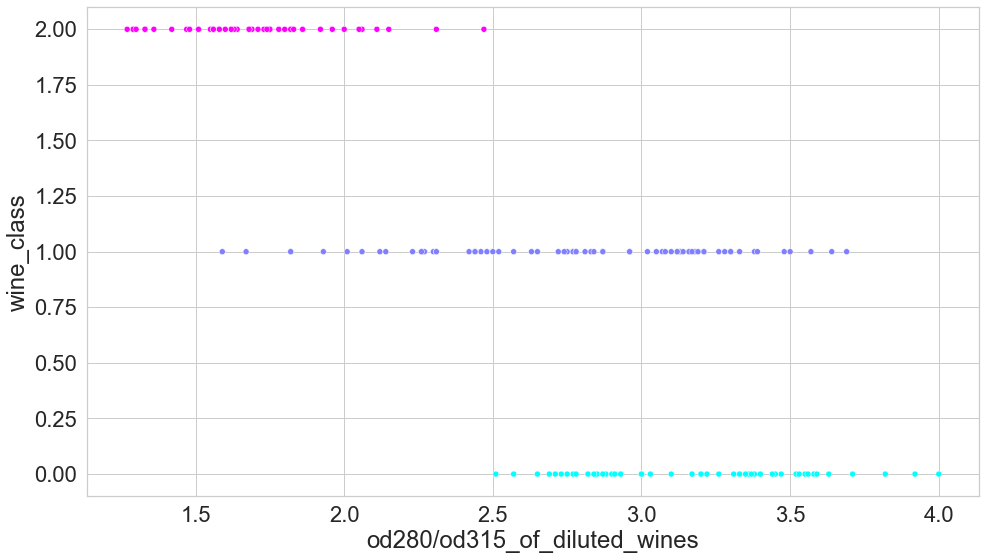

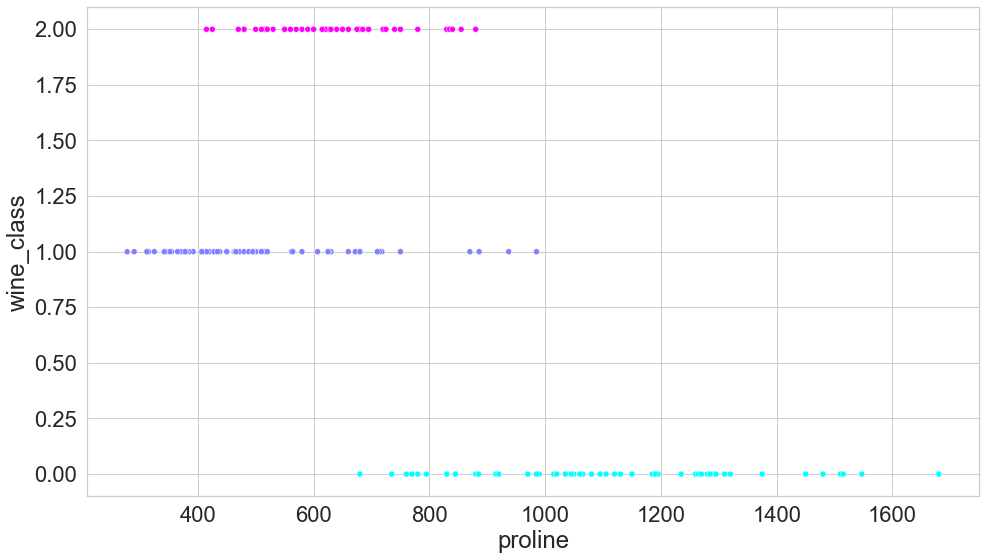

In [4]:
# visualization

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in wine.feature_names:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=wine_df, x=feature, y='wine_class', 
                     hue='wine_class', 
                     palette='cool', legend=False)

In [ ]:
# split the data for training and testing

from sklearn.model_selection import train_test_split

# test_size = 0.2 indicates 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(wine.data,wine.target,test_size=0.3)

# shape gives the number of rows and columns of train and test datasets.
print(f'Shape of training set X = {X_train.shape}')
print(f'Shape of testing  set X = {X_test.shape}')

print()

print(f'Shape of training set y = {y_train.shape}')
print(f'Shape of testing  set y = {y_test.shape}')

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import math
# choose k
test_k = math.sqrt(len(y_test))
# since it is even, to make it odd subtract 1 
k = test_k-1

knn = KNeighborsClassifier(n_neighbors=int(k))
knn.fit(X_train,y_train)

predicted = knn.predict(X_test)
expected = y_test

print(f'predicted classes : {predicted}')
print(f'expected classes : {expected}')

In [ ]:
# confusion matrix to evaluate the model

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=expected, y_pred=predicted)

# print(cm)

confusion_df = pd.DataFrame(cm,index=range(3),columns=range(3))
axes = sns.heatmap(confusion_df,annot=True, cmap='nipy_spectral_r')

In [ ]:
# f1 score
from sklearn.metrics import f1_score
print(f1_score(expected,predicted,average='micro'))

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score
print(f'accuracy score : {accuracy_score(expected,predicted):.1f}')

### K-Means Clustering - Unsupervised

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
# sample example by choosing blobs to represent dataset
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

In [ ]:
y_kmeans

In [ ]:
# sample dataset which is an image
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks = [], yticks=[])
ax.imshow(china)

In [ ]:
china.shape

In [ ]:
# scaling
data = china/255.0
# reduce 3D to 2D. Here 3 represents the 3 color codes R,G,B
data = data.reshape(427*640, 3)
data.shape

In [ ]:
data

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1,2, figsize=(16,6))
    
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20)

In [ ]:
plot_pixels(data, title='Input color space : 16 million possible colors')

In [ ]:
# MiniBatchKMeans is similar to KMeans just that it processes in batches and is faster. 
# Useful when we have large datasets.
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space : 16 colors")

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1,2, figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)

ax[1].imshow(china_recolored)
ax[1].set_title('16-colored Image', size=16)

In [ ]:
# pip install pywhatkit
# import pywhatkit as kit
# try:
#     kit.sendwhatmsg("+16478090771","from python code",21,32)
#     print("Successfully sent!")

# except:
#     print("unexpected error :(")